In [7]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import trackpy as tp
import utils
import analysis
from openpyxl import load_workbook

In [ ]:
folder = "/home/daniel/Documents/Image Processing/Mag/data/180116 batch after motion analysis"
data = analysis.batch_subtract_reference(folder)

In [ ]:
folder = "/home/daniel/Documents/Image Processing/Mag/data/180116 batch after motion analysis"
data = analysis.batch_motion(folder, mpp=0.207, fps=0.0333, sheetname='tracks corrected')

In [18]:
folder = "/home/daniel/Documents/Image Processing/Mag/data/180116 batch reference corrected"
uncorrected = pd.read_excel(os.path.join(folder, 'WT 6_channels_10_obcol.xlsx'), sheet_name='green motion')

<IPython.core.display.Javascript object>


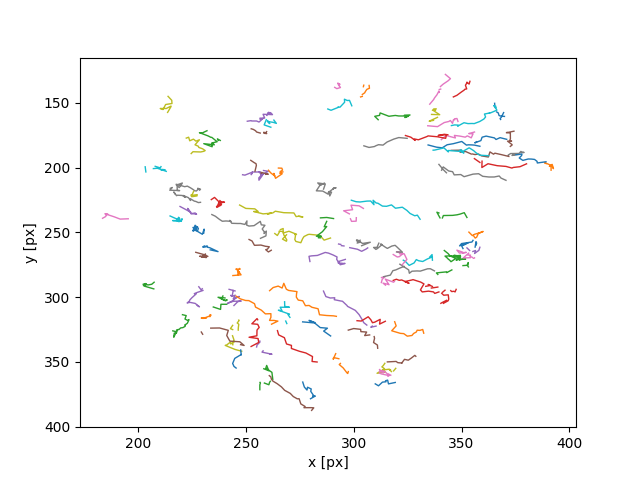

In [19]:
plt.figure()
ax = tp.plot_traj(uncorrected)

In [20]:
corrected = pd.read_excel(os.path.join(folder, 'WT 6_channels_10_obcol.xlsx'), sheet_name='green tracks corrected')

<IPython.core.display.Javascript object>


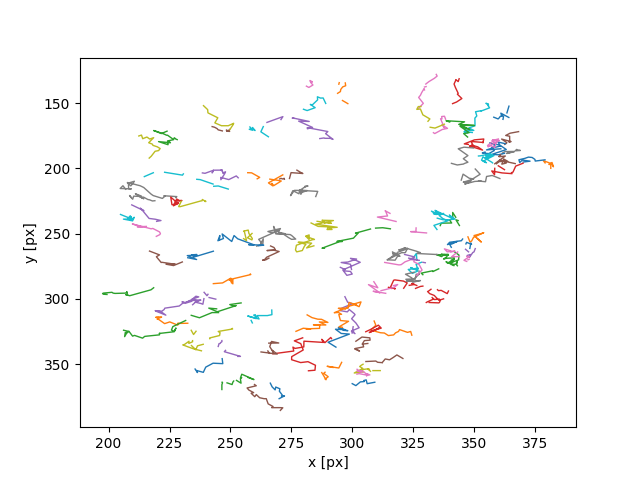

In [21]:
plt.figure()
ax = tp.plot_traj(corrected)

In [5]:
ref = pd.read_csv(folder + "/Results from WT 3 in µm per sec.csv")

In [7]:
ref_move = analysis.reference_movement(ref)
analysis.subtract_reference(red_tracks, ref_move)

,x,y,frame,patch id,particle,distance,Unnamed: 6,Unnamed: 7,particle id,slope,good,dx,dy,diagonal distance,diagonal speed,track distance,track speed
frame,,,,,,,,,,,,,,,,,
0,71.333333,38.333333,0,4,0,488.133407,NaN,NaN,0.0,-7.282298,0.0,0.000000,0.000000,0.758648,0.012215,4.568376,0.015226
0,43.166667,67.833333,0,13,4,494.649427,NaN,NaN,68.0,-0.868916,0.0,0.000000,0.000000,0.575523,0.007128,4.900235,0.012563
0,41.793103,71.482759,0,14,5,493.885649,NaN,NaN,81.0,2.766318,1.0,0.000000,0.000000,2.020406,0.007072,21.069839,0.015266
0,276.777778,218.222222,0,29,6,216.855018,NaN,NaN,124.0,1.135077,1.0,0.000000,0.000000,0.597470,0.005063,7.657880,0.013434
0,304.291667,240.458333,0,39,7,181.850795,NaN,NaN,138.0,0.200236,0.0,0.000000,0.000000,0.579229,0.004909,9.253214,0.016232
0,87.346154,48.192308,0,8,2,469.409943,NaN,NaN,34.0,0.140428,0.0,0.000000,0.000000,1.092214,0.007994,8.059351,0.012210
0,293.846154,242.923077,0,40,8,189.824288,NaN,NaN,157.0,1.069196,1.0,0.000000,0.000000,0.644759,0.010382,4.857330,0.016189
0,294.500000,270.000000,0,45,9,178.261746,NaN,NaN,168.0,1.091894,1.0,0.000000,0.000000,0.672402,0.012030,5.202232,0.019266
0,300.031250,282.937500,0,49,10,168.949341,NaN,NaN,178.0,0.232936,0.0,0.000000,0.000000,0.452810,0.004289,8.536724,0.016737


<IPython.core.display.Javascript object>


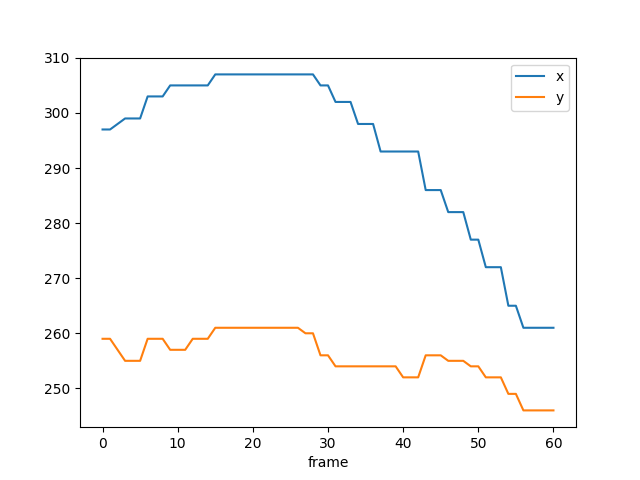

<IPython.core.display.Javascript object>


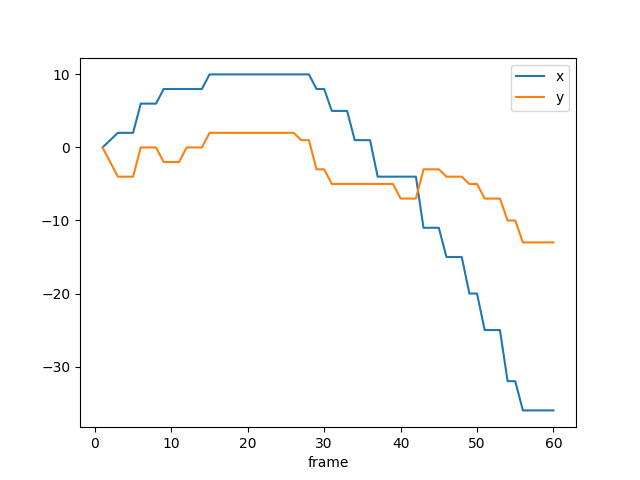

In [21]:
ref_coords = ref[['X', 'Y']].copy()
ref_coords.index.name = 'frame'
ref_coords.columns = ['x', 'y']
ref_coords.plot()
ref_coords_diff = ref_coords.diff().cumsum()
ref_coords_diff.plot()

In [22]:
def subtract_reference(traj, reference, inplace=False):
    if not inplace:
        traj = traj.copy()
    traj.set_index('frame', inplace=True, drop=False)
    traj.sort_index(inplace=True)
    for col in reference.columns:
        traj[col] = traj[col].sub(reference[col], fill_value=0, level='frame')
    return traj

In [23]:
green_tracks_dr = subtract_reference(green_tracks, ref_coords_diff)

<IPython.core.display.Javascript object>


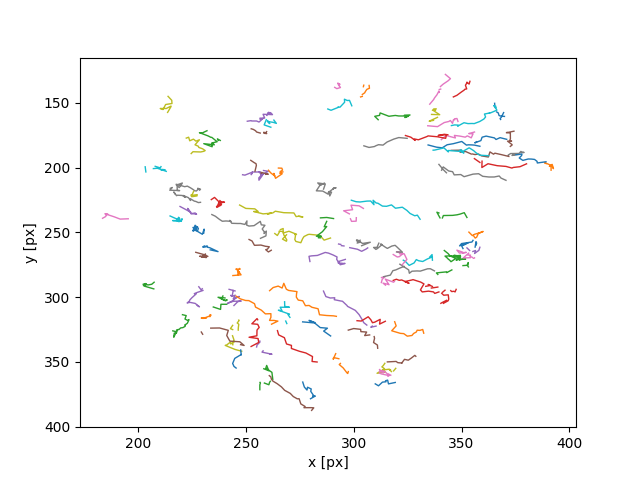

In [24]:
plt.figure()
ax = tp.plot_traj(green_tracks, label=False)

<IPython.core.display.Javascript object>


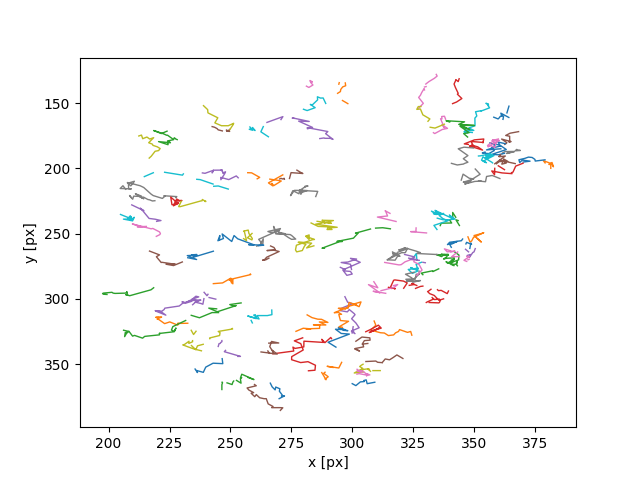

In [25]:
plt.figure()
ax = tp.plot_traj(green_tracks_dr, label=False)

In [58]:
green_tracks_dr[green_tracks_dr['particle'] == 23]

,x,y,frame,patch id,particle,diagonal distance,diagonal speed,track distance,track speed,dx,dy
frame,,,,,,,,,,,
29,162.200000,272.400000,29,62,23,15.331334,15.331334,33.390418,33.390418,0.000000,0.000000
30,159.333333,272.666667,30,60,23,15.331334,15.331334,33.390418,33.390418,3.133333,0.266667
31,342.000000,292.692308,31,60,23,15.331334,15.331334,33.390418,33.390418,0.666667,4.025641
32,340.500000,295.500000,32,71,23,15.331334,15.331334,33.390418,33.390418,-1.500000,2.807692
33,343.394737,294.000000,33,68,23,15.331334,15.331334,33.390418,33.390418,2.894737,-1.500000
34,341.666667,295.833333,34,64,23,15.331334,15.331334,33.390418,33.390418,-1.728070,1.833333
35,345.621053,294.000000,35,47,23,15.331334,15.331334,33.390418,33.390418,3.954386,-1.833333
36,346.200000,293.400000,36,45,23,15.331334,15.331334,33.390418,33.390418,0.578947,-0.600000
38,348.333333,290.888889,38,46,23,15.331334,15.331334,33.390418,33.390418,2.133333,-2.511111


In [59]:
green_tracks[green_tracks['particle'] == 23]

,x,y,frame,patch id,particle,diagonal distance,diagonal speed,track distance,track speed,dx,dy
280,338.200000,288.400000,29,62,23,15.331334,15.331334,33.390418,33.390418,0.000000,0.000000
281,341.333333,288.666667,30,60,23,15.331334,15.331334,33.390418,33.390418,3.133333,0.266667
282,342.000000,292.692308,31,60,23,15.331334,15.331334,33.390418,33.390418,0.666667,4.025641
283,340.500000,295.500000,32,71,23,15.331334,15.331334,33.390418,33.390418,-1.500000,2.807692
284,343.394737,294.000000,33,68,23,15.331334,15.331334,33.390418,33.390418,2.894737,-1.500000
285,341.666667,295.833333,34,64,23,15.331334,15.331334,33.390418,33.390418,-1.728070,1.833333
286,345.621053,294.000000,35,47,23,15.331334,15.331334,33.390418,33.390418,3.954386,-1.833333
287,346.200000,293.400000,36,45,23,15.331334,15.331334,33.390418,33.390418,0.578947,-0.600000
288,348.333333,290.888889,38,46,23,15.331334,15.331334,33.390418,33.390418,2.133333,-2.511111
289,349.214286,292.357143,39,42,23,15.331334,15.331334,33.390418,33.390418,0.880953,1.468254
